Note: some of the starting code was built upon notebooks developed for the FMA dataset, found at the FMA dataset github: https://github.com/mdeff/fma


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

from sklearn import metrics
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

pd.set_option('display.max_columns', None)

In [2]:
features = pd.read_csv("fma_metadata/features.csv", header=[0,1,2], index_col=0)
tracks = pd.read_csv("fma_metadata/tracks.csv", header = [0,1], index_col=0)

In [5]:
features.shape, tracks.shape

((106574, 518), (106574, 52))

In [6]:
features.sample(10)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
116231       -0.342083 -0.697906  0.747093 -0.395858 -0.640664 -0.410528   
73405         0.522778  0.066329 -0.068056  0.112166 -0.320042 -0.385165   
124441       -0.521253  0.574842 -0.109266 -0.675154 -0.548397  0.394474   
71312         1.198423  0.752427  0.515684  1.182321  0.491135  1.095473   
144244        0.822362  0.515403  2.683514  1.479702  0.347750  0.947540   
152055       -0.351650  1.346349 -0.784922 -1.125801  0.024545  1.372166   
23790        -0.162506 -0.103108  0.421620  0.639831  0.896113  0.528519   
114780       -0.614455 -0.635097 -1.066882 -1.307625 -0.055337 -1.543243   
16061        -0.813419 -1.159218 -0.948600 -1.307680 -1.591693 -1.035568   
109358       -1.399247 -1.303373 -1.024897 -0.294219 -0.483440  0.065588   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
116231     -0.811286 -1.440469 -0.897247 -0.112267 -0.150025  0.570006   
73405       0.987476 -0.300251 -0.509336  1.161425  1.379741 -0.105400   
124441      1.059664 -0.587618  1.043774  0.799608 -0.256844 -0.417577   
71312       1.638986  0.664232  0.244720  0.551045  0.807977  0.777678   
144244      1.054917  0.717315 -0.440685  0.606023  0.619488  0.032320   
152055      0.565247 -0.604542  0.858512  0.941963  1.231256  3.312430   
23790       0.680235 -0.232928  1.371987 -0.267945 -0.003358 -0.750313   
114780     -1.298566  4.345478 -0.470806 -0.182515  0.491927  0.001593   
16061      -0.683274 -0.380739 -1.084214  1.048089 -0.967926 -1.323462   
109358     -0.494042 -0.763570 -0.861111  0.539826 -0.131855 -0.507467   

feature                                                                 \
statistics       max                                                     
number            01        02        03        04        05        06   
track_id                                                                 
116231      0.576463  0.646959  0.689026  0.481148  0.530014  0.663178   
73405       0.469756  0.467207  0.667636  0.650949  0.625386  0.496185   
124441      0.551341  0.661330  0.635838  0.704093  0.524937  0.597211   
71312       0.676866  0.562116  0.630782  0.597404  0.503534  0.627140   
144244      0.641264  0.644504  0.688776  0.518846  0.472375  0.676944   
152055      0.527624  0.606568  0.552914  0.476584  0.437587  0.491732   
23790       0.661357  0.472285  0.575380  0.500036  0.449646  0.534374   
114780      0.445630  0.614712  0.515955  0.719609  0.546720  0.626508   
16061       0.615561  0.705141  0.715750  0.547197  0.686110  0.497027   
109358      0.455354  0.624679  0.675853  0.569912  0.705094  0.625671   

feature                                                                 \
statistics                                                               
number            07        08        09        10        11        12   
track_id                                                                 
116231      0.675311  0.697323  0.639602  0.672680  0.679342  0.596148   
73405       0.578494  0.575196  0.432210  0.549337  0.529945  0.489193   
124441      0.708577  0.575801  0.698157  0.646331  0.678919  0.668477   
71312       0.626566  0.578236  0.542636  0.500322  0.672879  0.670820   
144244      0.530577  0.689141  0.553079  0.560214  0.727607  0.510587   
152055      0.482597  0.331233  0.473684  0.416345  0.458412  0.555763   
23790       0.497030  0.584185  0.637858  0.481968  0.699405  0.545488   
114780      0.452178  0.260145  0.363484  0.473

In [5]:
tracks.sample(10)

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
47175           0  2011-04-23 00:17:31  2011-04-02 00:00:00      NaN   
100709          2  2014-03-09 14:37:02                  NaN      NaN   
149842          0  2017-01-23 15:44:36  2015-12-05 00:00:00      NaN   
48768           0  2011-06-10 16:27:13  2009-01-19 00:00:00      NaN   
81672           0  2013-04-04 03:41:03                  NaN      NaN   
108422          0  2014-08-22 00:31:12  2014-08-22 00:00:00      NaN   
93912           0  2013-11-10 12:58:36  2008-05-10 00:00:00      NaN   
37515           0  2010-10-14 19:34:28                  NaN      NaN   
89935           2  2013-08-31 09:49:49  2013-08-31 00:00:00      NaN   
81278           0  2013-04-01 08:20:05  2013-04-01 00:00:00   iPhone   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
47175            0   9030  <p>Old-school hip-hop out of Bandung &amp; Dub...   
100709           2  16127                                                NaN   
149842           1  22348  <p>Split Tape: One side is by Draache, the oth...   
48768            0   9326  <p><span class="style16">Recorded in February ...   
81672            0  13931                                                NaN   
108422           2  16862  <p><span style="color: #222222; font-family: '...   
93912            0  15432  <p>Previously self-released in limited edition...   
37515            3   7535                                                NaN   
89935            3  14970  <p><span style="font-family: 'times new roman'...   
81278            0  13891  <p>Mother Sky / Slackwaves</p>\n<p>Live Strict...   

                                                                         \
         listens producer                                          tags   
track_id                                                                  
47175      10623      NaN                                            []   
100709     40564      NaN                                            []   
149842      4286      NaN                                            []   
48768       2759      NaN                                            []   
81672     103485      NaN                                            []   
108422     57476      NaN                                            []   
93912      11408      NaN                                            []   
37515       1694      NaN                                            []   
89935      23919      NaN                                            []   
81278      30475      NaN  ['freeform', 'improv', 'slack', 'prog-rock']   

                                                                     artist  \
                                   title tracks   type    active_year_begin   
track_id                                                                      
47175       The Bandung Dubai Connection     15  Album                  NaN   
100709                 Head Down Sunrise     27    NaN  2005-01-01 00:00:00   
149842      Split Draache / Manuel Duval     27  Album  2000-01-01 00:00:00   
48768                         Love Songs     12  Album                  NaN   
81672                              Party     17  Album  2007-01-01 00:00:00   
108422         Free Music Project Vol. 2      9  Album                  NaN   
93912                    The Secret Rift     11  Album                  NaN   
37515                  All Ice e Berries      8  Album                  NaN   
89935     Classwar Karaoke - 0023 Survey     91  Album                  NaN   
81278               Strictly Improv Live      6  Album                  NaN   

                              

# EDA / Data Cleaning

### What are the top genres in this dataset? What does their distribution look like? How many "top genres" are NA?

#### the full dataset has NaN for about half of the genre_top features

In [6]:
# Top Genres list for the entire set 
tracks.loc[:,('track','genre_top')].value_counts(dropna=False)

NaN                    56976
Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: (track, genre_top), dtype: int64

In [7]:
# Create a large subset that drops rows with NaN in the genre_top column
tracks['track','genre_top'] = tracks['track','genre_top'].fillna(0) 
large = tracks['track','genre_top'] != 0 
tracks.loc[large,('track','genre_top')].value_counts(dropna=False)

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: (track, genre_top), dtype: int64

#### Notice there's a huge class imbalance in the largest dataset. I trim it down below:

In [8]:
# create a large subset with only genres that have at least 1000 tracks 
large_b = ((tracks['track','genre_top'] != 0) & ((tracks['track','genre_top'] == ("Rock"))
                                                 |(tracks['track','genre_top'] == ("Experimental"))
                                                 |(tracks['track','genre_top'] == ("Electronic"))
                                                 |(tracks['track','genre_top'] == ("Hip_Hop"))
                                                 |(tracks['track','genre_top'] == ("Folk"))
                                                 |(tracks['track','genre_top'] == ("Pop"))
                                                 |(tracks['track','genre_top'] == ("Instrumental"))
                                                 |(tracks['track','genre_top'] == ("International"))
                                                 |(tracks['track','genre_top'] == ("Classical"))))
                                        
tracks.loc[large_b,('track','genre_top')].value_counts(dropna=False)

Rock             14182
Experimental     10608
Electronic        9372
Folk              2803
Pop               2332
Instrumental      2079
International     1389
Classical         1230
Name: (track, genre_top), dtype: int64

In [9]:
tracks.loc[large_b,('track','genre_top')].shape

(43995,)

### What are the major features in this dataset?

In [10]:
feature_list = features.columns.levels[0].tolist()
feature_list

['chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'mfcc',
 'rmse',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_rolloff',
 'tonnetz',
 'zcr']

In [11]:
# Add a few feature combinations (based on EDA done in the MVP)

# Top 2 features with best accuracy scores by SVC classification
feature_list.append(['mfcc','spectral_contrast'])
# Top 4 features with best accuracy scores by SVC classification
feature_list.append(['mfcc','spectral_contrast','chroma_cqt','chroma_stft'])
# Removes the 4 features with the worst accuracy scores by SVC classification
feature_list.append(['chroma_cens','chroma_cqt','chroma_stft','mfcc','spectral_centroid',
                     'spectral_contrast','tonnetz'])
# All the features!
feature_list.append(['chroma_cens','chroma_cqt','chroma_stft','mfcc','rmse','spectral_bandwidth','spectral_centroid',
                     'spectral_contrast','spectral_rolloff','tonnetz','zcr'])

# Indexes for the tables
indexes = ['chroma_cens','chroma_cqt','chroma_stft','mfcc','rmse','spectral_bandwidth','spectral_centroid',
           'spectral_contrast','spectral_rolloff','tonnetz','zcr',
           'mfcc/spectral_contrast',
           'mfcc/spectral_contrast/chroma_cqt/chroma_stft',
           'chroma_cens/chroma_cqt/chroma_stft/mfcc/spectral_centroid/spectral_contrast/tonnetz',
           'ALL']

# Data Analysis


In [12]:
accuracy_scores = pd.DataFrame(index=indexes)

# Add first column with the number of dimensions for each of the features
dim_col = []
for feature in feature_list:
    X = features.loc[large_b, (feature)]
    dim_col.append(X.shape[1])
accuracy_scores['dim']=dim_col

In [13]:
recall_scores = pd.DataFrame(index=indexes)

# Add first column with the number of dimensions for each of the features
dim_col = []
for feature in feature_list:
    X = features.loc[large_b, (feature)]
    dim_col.append(X.shape[1])
recall_scores['dim']=dim_col


In [14]:
f1_scores = pd.DataFrame(index=indexes)

# Add first column with the number of dimensions for each of the features
dim_col = []
for feature in feature_list:
    X = features.loc[large_b, (feature)]
    dim_col.append(X.shape[1])
f1_scores['dim']=dim_col


### Logistic Regression

In [15]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['lr'] = accuracy_col
# recall_scores['lr'] = recall_col
# f1_scores['lr'] = f1_col

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CPU times: user 16min 1s, sys: 8.21 s, total: 16min 9s
Wall time: 2min 46s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Weighted Logistic Regression

In [16]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    lr_weighted = LogisticRegression(max_iter=1000,class_weight={'International' : 4, 'Classical' : 4, 
                                               'Instrumental':3,'Folk':2, 'Pop':2}, solver='liblinear')
    lr_weighted.fit(X_train, y_train)
    y_pred = lr_weighted.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['weighted lr'] = accuracy_col
# recall_scores['weighted lr'] = recall_col
# f1_scores['weighted lr'] = f1_col

CPU times: user 21min 10s, sys: 2.73 s, total: 21min 12s
Wall time: 20min 58s


### K Nearest Neighbors

In [17]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, (feature)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=200)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['knn'] = accuracy_col
# recall_scores['knn'] = recall_col
# f1_scores['knn'] = f1_col

CPU times: user 1min 57s, sys: 20.1 s, total: 2min 17s
Wall time: 1min 9s


### Decision Tree

In [18]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    DT = DecisionTreeClassifier(max_depth=5)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['dt'] = accuracy_col
# recall_scores['dt'] = recall_col
# f1_scores['dt'] = f1_col

CPU times: user 35.7 s, sys: 1.53 s, total: 37.2 s
Wall time: 37.2 s


### Random Forest

In [19]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    RF = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['rf'] = accuracy_col
# recall_scores['rf'] = recall_col
# f1_scores['rf'] = f1_col

CPU times: user 6.28 s, sys: 1.63 s, total: 7.91 s
Wall time: 7.91 s


### Ada Boost

In [20]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    ada = AdaBoostClassifier(n_estimators=10)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['ada'] = accuracy_col
# recall_scores['ada'] = recall_col
# f1_scores['ada'] = f1_col

CPU times: user 1min 20s, sys: 1.97 s, total: 1min 22s
Wall time: 1min 22s


### Naive Bayes

In [21]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    nbc_base = GaussianNB()
    nbc_base.fit(X_train, y_train)
    y_pred = nbc_base.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['nb'] = accuracy_col
# recall_scores['nb'] = recall_col
# f1_scores['nb'] = f1_col

CPU times: user 5.7 s, sys: 2.14 s, total: 7.84 s
Wall time: 7.84 s


### SVC Classifier

In [22]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    SVCrbf = SVC(kernel='rbf')
    SVCrbf.fit(X_train, y_train)
    y_pred = SVCrbf.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['svc'] = accuracy_col
# recall_scores['svc'] = recall_col
# f1_scores['svc'] = f1_col

CPU times: user 53min 31s, sys: 31 s, total: 54min 2s
Wall time: 54min 3s


In [23]:
accuracy_scores

,dim,lr,weighted lr,knn,dt,rf,ada,nb,svc
chroma_cens,84,0.440,0.426,0.434,0.391,0.372,0.349,0.179,0.519
chroma_cqt,84,0.433,0.422,0.435,0.390,0.383,0.367,0.046,0.528
chroma_stft,84,0.463,0.454,0.467,0.437,0.416,0.386,0.081,0.527
mfcc,140,0.606,0.595,0.571,0.514,0.494,0.487,0.447,0.672
rmse,7,0.440,0.431,0.457,0.442,0.446,0.433,0.247,0.460
spectral_bandwidth,7,0.408,0.401,0.457,0.443,0.443,0.423,0.399,0.464
spectral_centroid,7,0.417,0.409,0.466,0.446,0.450,0.437,0.392,0.467
spectral_contrast,49,0.553,0.547,0.527,0.477,0.473,0.456,0.444,0.626
spectral_rolloff,7,0.425,0.416,0.466,0.461,0.455,0.440,0.393,0.474
tonnetz,42,0.454,0.444,0.447,0.414,0.385,0.390,0.324,0.513


In [24]:
accuracy_scores.to_excel("accuracyScores.xlsx")

#### Weighted SVC classifier

In [ ]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    SVCrbf = SVC(kernel='rbf',class_weight={'International' : 4, 'Classical' : 4, 'Instrumental':3,'Folk':2, 'Pop':2}solver='liblinear')
    SVCrbf.fit(X_train, y_train)
    y_pred = SVCrbf.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['weighted svc'] = accuracy_col
# recall_scores['weighted svc'] = recall_col
# f1_scores['weighted svc'] = f1_col

#### SVC optimized with grid search

In [ ]:
%%time

accuracy_col = []
recall_col = []
f1_col = []

for feature in feature_list:
    y = tracks.loc[large_b, ('track','genre_top')]
    X = features.loc[large_b, feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_test)
    SVCrbf = SVC(C=10,kernel='rbf')
    SVCrbf.fit(X_train, y_train)
    y_pred = SVCrbf.predict(X_test)
    accuracy_col.append(metrics.accuracy_score(y_test, y_pred).round(3))
#     recall_col.append(metrics.recall_score(y_test, y_pred,average='macro').round(3))
#     f1_col.append(metrics.f1_score(y_test, y_pred,average='macro').round(3))

accuracy_scores['svc'] = accuracy_col
# recall_scores['svc'] = recall_col
# f1_scores['svc'] = f1_col

In [ ]:
accuracy_scores

#### Optimize SVC with grid search

In [ ]:
# I couldn't fully run this. Took too many hours.

y = tracks.loc[large_b, ('track','genre_top')]
X = features.loc[large_b, 'mfcc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)


# defining parameter range 
param_grid = {'C': [0.01,0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

# fitting the model for grid search 
grid.fit(X_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
y_pred = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, y_pred))

In [29]:
accuracy_scores.to_excel("accuracy_scores.xlsx")

# Visualizations

## Confusion Matrix

In [25]:
# Logistic Regression with all of the features
y = tracks.loc[large_b, ('track','genre_top')]
X = features.loc[large_b, ['chroma_cens','chroma_cqt','chroma_stft','mfcc','rmse','spectral_bandwidth','spectral_centroid',
                           'spectral_contrast','spectral_rolloff','tonnetz','zcr']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
print("recall score: ", metrics.recall_score(y_test, y_pred,average='macro').round(3))
print("f1 score: ", metrics.f1_score(y_test, y_pred,average='macro').round(3))


accuracy score:  0.682
recall score:  0.552
f1 score:  0.565


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
sorted(tracks.loc[large_b,('track','genre_top')].unique())

['Classical',
 'Electronic',
 'Experimental',
 'Folk',
 'Instrumental',
 'International',
 'Pop',
 'Rock']

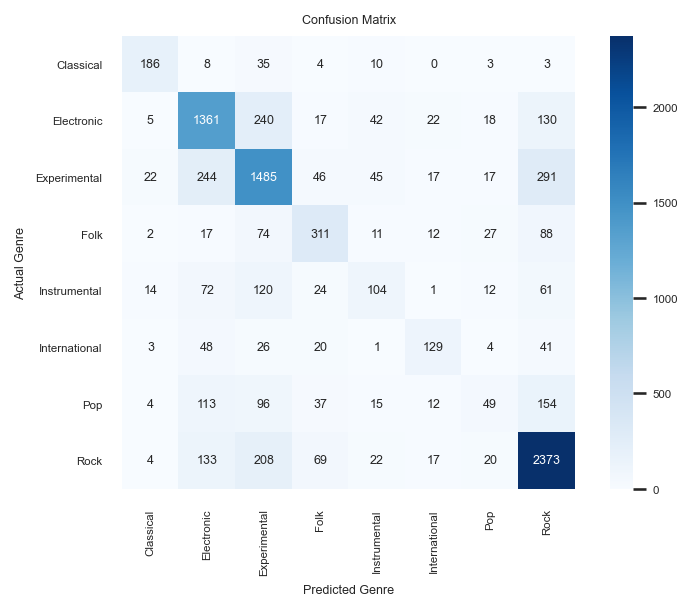

In [27]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.set(font_scale=0.5)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt = "d",
           xticklabels=['Classical','Electronic','Experimental','Folk',
                        'Instrumental','International','Pop','Rock'],
                        
           yticklabels=['Classical','Electronic','Experimental','Folk',
                        'Instrumental','International','Pop','Rock'])
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.title('Confusion Matrix')
plt.yticks(rotation=0);

In [28]:
# Logistic Regression with weighted genres and all features
y = tracks.loc[large_b, ('track','genre_top')]
X = features.loc[large_b, ['chroma_cens','chroma_cqt','chroma_stft','mfcc','rmse','spectral_bandwidth','spectral_centroid',
                           'spectral_contrast','spectral_rolloff','tonnetz','zcr']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

lr_weighted = LogisticRegression(class_weight={'International' : 4, 'Classical' : 4, 
                                               'Instrumental':3,'Folk':2, 'Pop':2}, solver='liblinear')
lr_weighted.fit(X_train, y_train)
y_pred = lr_weighted.predict(X_test)
print("weighted lr accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
print("weighted lr recall score: ", metrics.recall_score(y_test, y_pred,average='macro').round(3))
print("weighted lr f1 score: ", metrics.f1_score(y_test, y_pred,average='macro').round(3))


weighted lr accuracy score:  0.675
weighted lr recall score:  0.576
weighted lr f1 score:  0.563


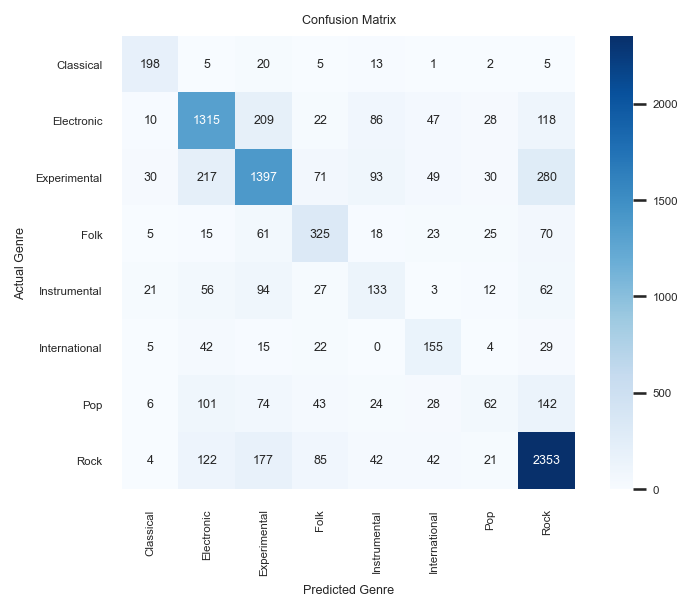

In [29]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.set(font_scale=0.5)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt = "d",
           xticklabels=['Classical','Electronic','Experimental','Folk',
                        'Instrumental','International','Pop','Rock'],
                        
           yticklabels=['Classical','Electronic','Experimental','Folk',
                        'Instrumental','International','Pop','Rock'])
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.title('Confusion Matrix')
plt.yticks(rotation=0);

In [46]:
# Confusion matrix with SVM classifier, all genres
y = tracks.loc[large_b, ('track','genre_top')]
X = features.loc[large_b, ['chroma_cens','chroma_cqt','chroma_stft','mfcc','rmse','spectral_bandwidth','spectral_centroid',
                           'spectral_contrast','spectral_rolloff','tonnetz','zcr']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)
SVCrbf = SVC(kernel='rbf')
SVCrbf.fit(X_train, y_train)
y_pred = SVCrbf.predict(X_test)
print("accuracy score: ", metrics.accuracy_score(y_test, y_pred).round(3))
print("recall score: ", metrics.recall_score(y_test, y_pred,average='macro').round(3))
print("f1 score: ", metrics.f1_score(y_test, y_pred,average='macro').round(3))
print(sklearn.metrics.classification_report(y_test, y_pred))

accuracy score:  0.715
recall score:  0.566
f1 score:  0.594
               precision    recall  f1-score   support

    Classical       0.87      0.75      0.81       249
   Electronic       0.71      0.77      0.74      1835
 Experimental       0.65      0.78      0.71      2167
         Folk       0.66      0.61      0.64       542
 Instrumental       0.54      0.22      0.31       408
International       0.88      0.48      0.62       272
          Pop       0.55      0.07      0.12       480
         Rock       0.78      0.85      0.81      2846

     accuracy                           0.71      8799
    macro avg       0.70      0.57      0.59      8799
 weighted avg       0.71      0.71      0.69      8799



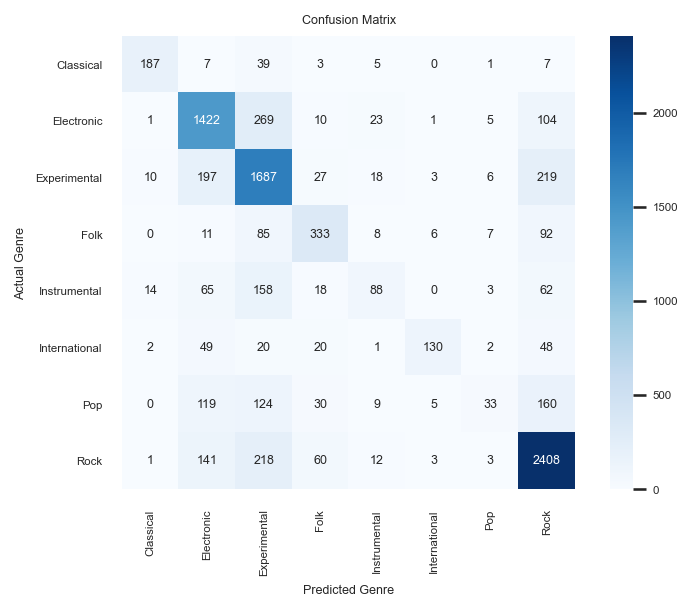

In [52]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.set(font_scale=0.5)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt = "d",
           xticklabels=['Classical','Electronic','Experimental','Folk',
                        'Instrumental','International','Pop','Rock'],
                        
           yticklabels=['Classical','Electronic','Experimental','Folk',
                        'Instrumental','International','Pop','Rock'])
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.title('Confusion Matrix')
plt.yticks(rotation=0)
plt.savefig('svc confusion_matrix'+'.jpg');

## PCA plots

((15412, 2), (15412,))

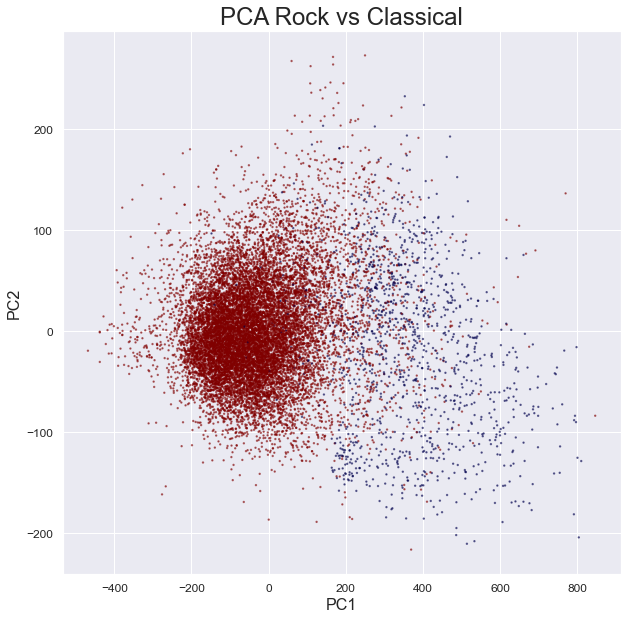

In [32]:
# Two genres that are RARELY misclassified as each other
# Note: this code was loosely borrowed from the FMA "usage" notebook (https://nbviewer.org/github/mdeff/fma/blob/outputs/usage.ipynb)
# all starting materials found at their github: https://github.com/mdeff/fma

genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Classical'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('PCA Rock vs Classical', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=2)
X.shape, y.shape


((15412, 2), (15412,))

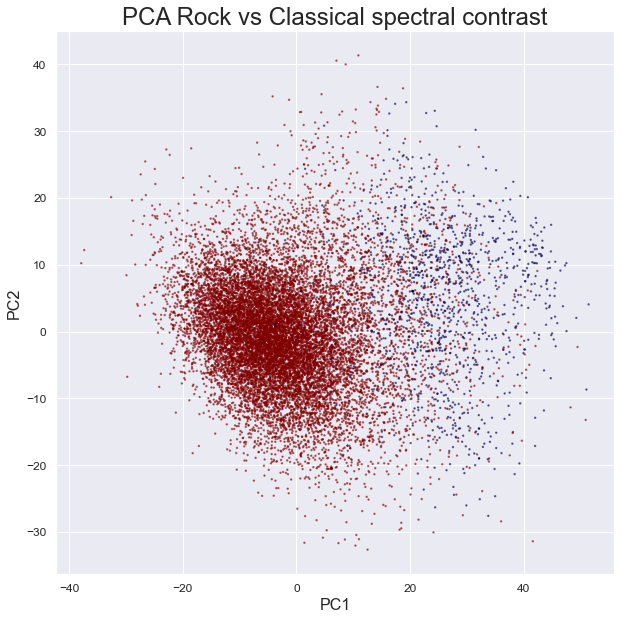

In [33]:
# Two genres that are RARELY misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Classical'

X = features.loc[large_b & (genre1 | genre2), 'spectral_contrast']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('PCA Rock vs Classical spectral contrast', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=2)
X.shape, y.shape


((4033, 2), (4033,))

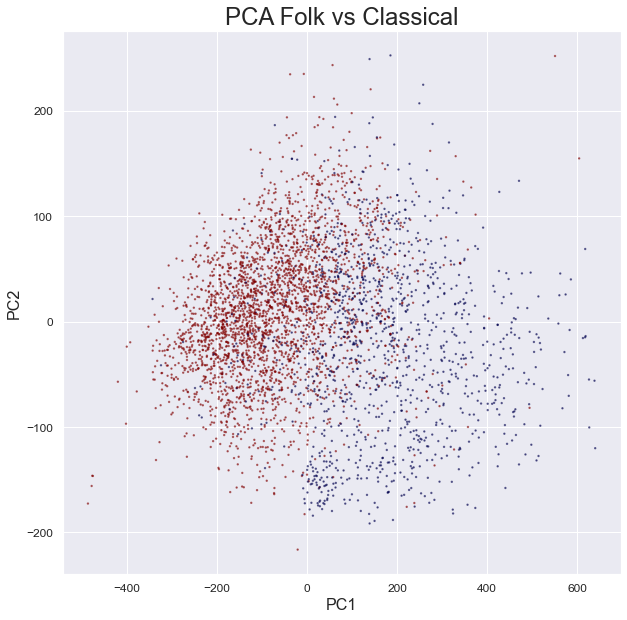

In [34]:
# Two genres that are RARELY misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Folk'
genre2 = tracks['track', 'genre_top'] == 'Classical'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('PCA Folk vs Classical', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=2)
X.shape, y.shape


((15412, 2), (15412,))

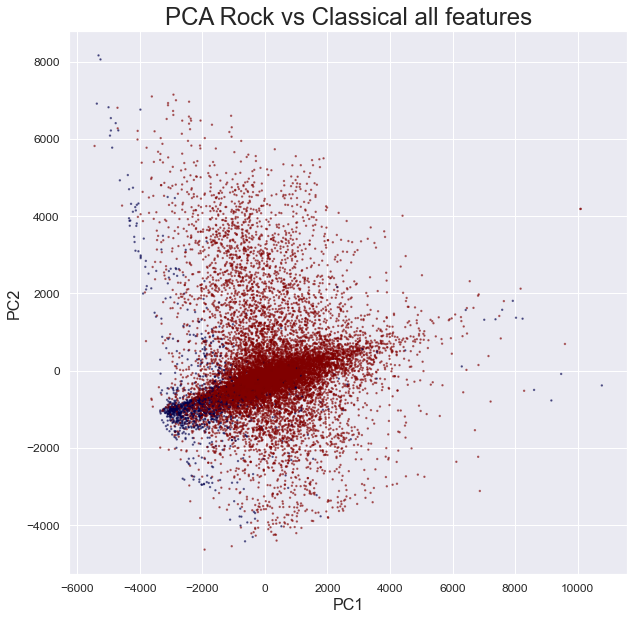

In [35]:
# Two genres that are RARELY misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Classical'

X = features.loc[large_b & (genre1 | genre2), ['chroma_cens','chroma_cqt','chroma_stft','mfcc','rmse','spectral_bandwidth','spectral_centroid',
                     'spectral_contrast','spectral_rolloff','tonnetz','zcr']]
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('PCA Rock vs Classical all features', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=2)
X.shape, y.shape


((10602, 2), (10602,))

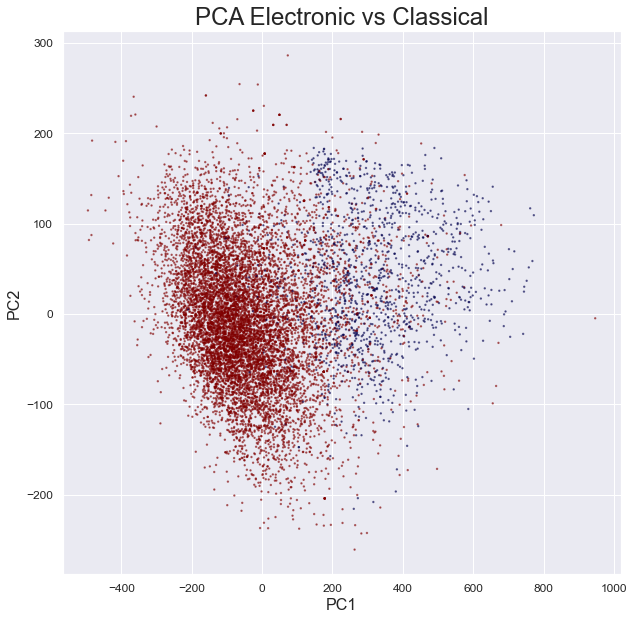

In [36]:
# Two genres that are RARELY misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Classical'
genre2 = tracks['track', 'genre_top'] == 'Electronic'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('PCA Electronic vs Classical', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=2)
X.shape, y.shape


((12175, 2), (12175,))

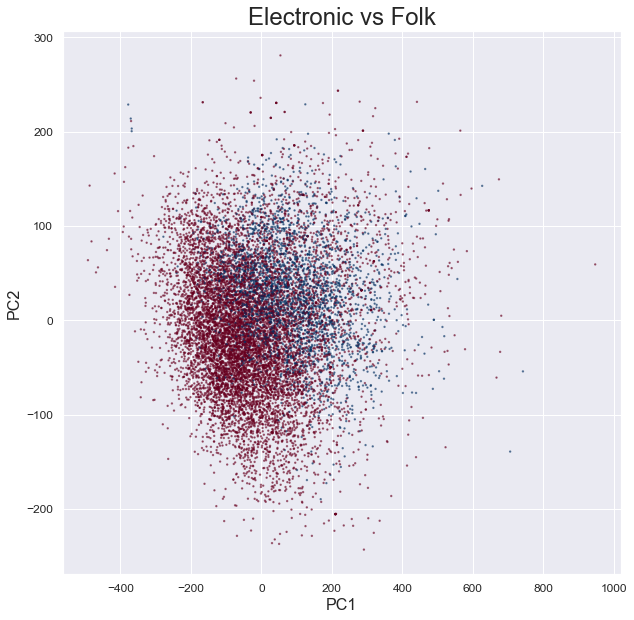

In [37]:
# Two genres that are SOMETIMES misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Electronic'
genre2 = tracks['track', 'genre_top'] == 'Folk'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('Electronic vs Folk', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5, s=2)
X.shape, y.shape


((23554, 2), (23554,))

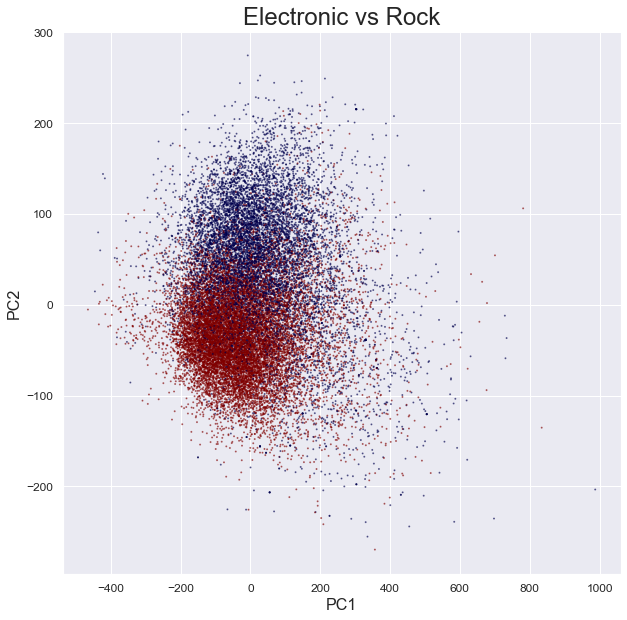

In [38]:
# Two genres that are OFTEN missclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Electronic'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('Electronic vs Rock', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=1)
X.shape, y.shape


((19980, 2), (19980,))

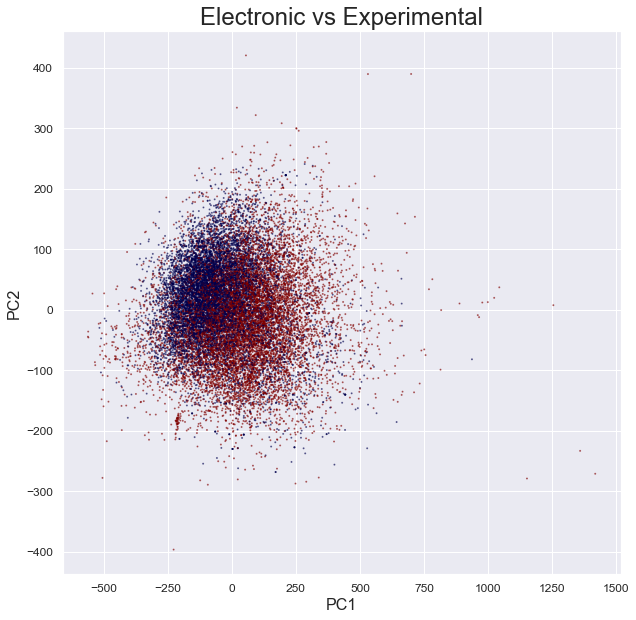

In [39]:
# Two genres that are OFTEN misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Experimental'
genre2 = tracks['track', 'genre_top'] == 'Electronic'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('Electronic vs Experimental', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='seismic', alpha=0.5, s=1)
X.shape, y.shape


((12940, 2), (12940,))

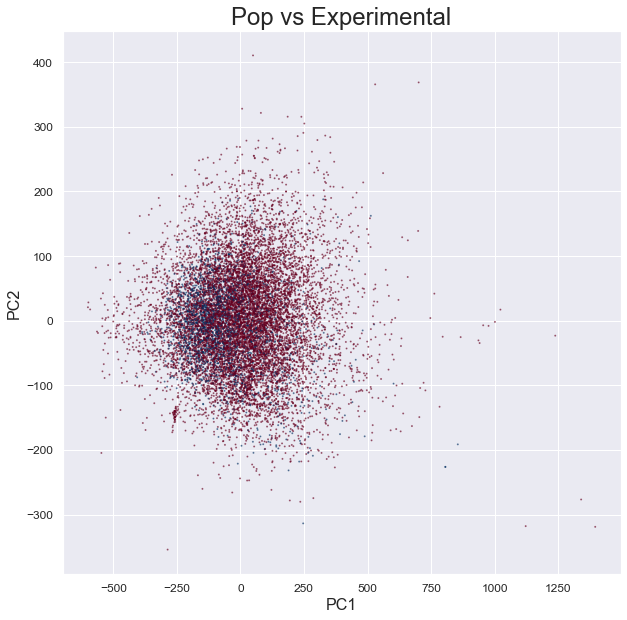

In [40]:
# Two genres that are OFTEN misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Pop'
genre2 = tracks['track', 'genre_top'] == 'Experimental'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('Pop vs Experimental', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5, s=1)
X.shape, y.shape


((11704, 2), (11704,))

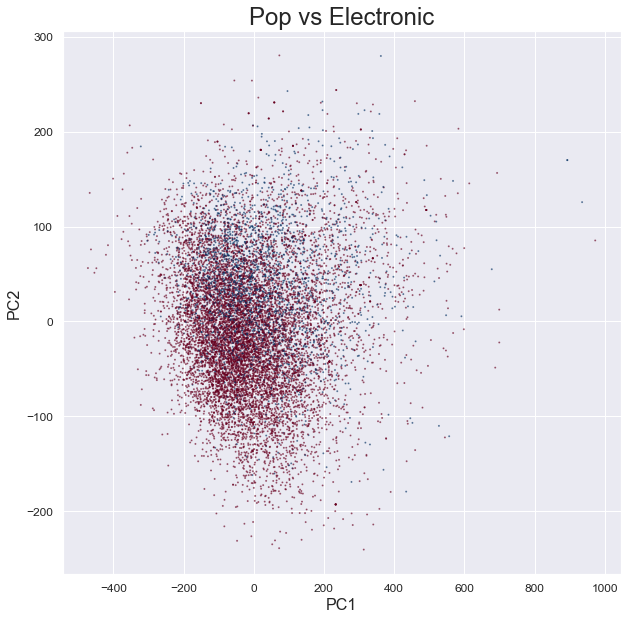

In [49]:
# Two genres that are OFTEN misclassified as each other

genre1 = tracks['track', 'genre_top'] == 'Pop'
genre2 = tracks['track', 'genre_top'] == 'Electronic'

X = features.loc[large_b & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[large_b & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.figure(figsize=(10,10))
plt.title('Pop vs Electronic', fontsize=24)
plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5, s=1)
X.shape, y.shape
